In [43]:
import math
import numpy as np
import matplotlib.pyplot as plt

from my_helpers import *
import viz

import schemdraw
import schemdraw.elements as elm

# Series Resonant Band-Pass Filter

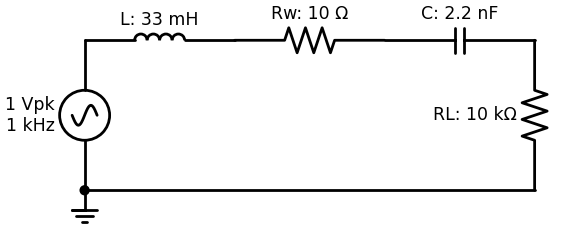

In [44]:
# Circuit 1
with schemdraw.Drawing() as d:
    V_in = elm.SourceSin().label('1 Vpk\n1 kHz')
    elm.Inductor().right().label('L: 33 mH')
    elm.Resistor().label('Rw: 10 Ω')
    elm.Capacitor().label('C: 2.2 nF')
    elm.Resistor().down().label('RL: 10 kΩ')
    elm.Line().to(V_in.start).dot()
    elm.Ground()

In [45]:
# Define our variables
V_in = 1
R1 = 10*si.k
Rw = 10
C = 2.2*si.n
L = 33*si.m

In [46]:
# Get resonant frequency
fr = get_resonant_frequency(L,C)
fr_precise = get_exact_resonant_frequency(Rw,L,C)

print(fr)
print(fr_precise)

18678.922547318176
18678.860284139246


In [47]:
Xl = get_inductive_reactance(L,fr)
Xl

3872.983346207417j

In [48]:
Xc = get_capacitive_reactance(C,fr)
Xc

-3872.9833462074166j

In [49]:
Z = sum([Xl,Xc,Rw,R1])
polar_format(Z)

(10010.0, 2.6029074875673454e-15)

In [50]:
quality_factor = abs(Xl)/sum([Rw,R1])
quality_factor

0.3869114231975442

In [51]:
bandwidth = fr/quality_factor
engFormat(bandwidth)

'48.277 k'

In [54]:
bandwidth/2

24138.49970227079

In [55]:
lower_fc = fr - bandwidth/2
upper_fc = fr + bandwidth/2

lower_fc,upper_fc

(-5459.577154952614, 42817.42224958897)

This is obviously wrong

In [64]:
# Alternate method to find quality factor
Rt = sum([R1,Rw])
(1/Rt)*np.sqrt(L/C)

0.3869114231975441

In [65]:
# Alternate-alternate method to find quality factor
fr/(48.1*si.k)

0.38833518809393297